# Importing Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

In [2]:
!pip install streamlit

In [3]:
!pip3 freeze > requirementsV2.txt

In [4]:
print("pandas",pd.__version__)
print("numpy", np.__version__)

pandas 2.1.4
numpy 1.24.4


# Data Observation

In [5]:
df_data = pd.read_csv("CHLA_clean_data_until_2023.csv")

In [6]:
df_data

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE,IS_NOSHOW
0,1946298,CONFIRMED,12/26/23 10:30,6/6/23 10:32,91387,VALENCIA CARE CENTER,22576917,77137126,202,Y,...,5,0,1,4,12,10,14,Non-Hispanic,European,N
1,4464320,RESCHEDULED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,21812159,74489619,363,Y,...,2,0,1,4,12,10,3,Others,Other,N
2,4464320,CONFIRMED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,22496669,76863542,363,Y,...,2,0,1,4,12,10,3,Others,Other,N
3,4146637,CONFIRMED,12/21/23 10:30,1/23/23 10:59,91350,VALENCIA CARE CENTER,22466003,76767204,331,Y,...,4,0,3,3,12,10,12,Non-Hispanic,European,N
4,4460795,CONFIRMED,12/18/23 9:00,1/9/23 10:59,91402,VALENCIA CARE CENTER,21862889,74656637,342,Y,...,3,0,0,3,12,9,13,Others,Other,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,4109677,CHECKED OUT,4/24/18 10:30,4/9/18 15:15,91108,ARCADIA CARE CENTER,14657077,45785685,14,N,...,3,0,1,4,4,10,9,Others,Other,N
21056,1893524,CHECKED OUT,4/17/18 11:30,1/16/18 11:20,90041,ARCADIA CARE CENTER,14684208,45874999,91,N,...,10,3,1,3,4,11,20,Others,Other,N
21057,4174648,RESCHEDULED,4/4/18 8:40,3/5/18 11:52,92410,ARCADIA CARE CENTER,14526629,45343418,29,N,...,0,0,2,1,4,8,20,Others,Other,N
21058,1352218,CHECKED OUT,3/20/18 12:10,3/20/18 9:15,91350,ARCADIA CARE CENTER,14583939,45539383,0,N,...,1,0,1,3,3,12,24,Non-Hispanic,Other,N


In [7]:
df_data.dtypes

MRN                                          int64
APPT_STATUS                                 object
APPT_DATE                                   object
BOOK_DATE                                   object
ZIPCODE                                     object
CLINIC                                      object
SCHEDULE_ID                                  int64
APPT_ID                                      int64
LEAD_TIME                                    int64
IS_REPEAT                                   object
APPT_TYPE_STANDARDIZE                       object
APPT_NUM                                     int64
TOTAL_NUMBER_OF_CANCELLATIONS                int64
TOTAL_NUMBER_OF_RESCHEDULED                  int64
TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT     int64
TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT          int64
TOTAL_NUMBER_OF_NOSHOW                       int64
DAY_OF_WEEK                                  int64
WEEK_OF_MONTH                                int64
NUM_OF_MONTH                   

In [8]:
df_data = df_data.drop(['APPT_STATUS', 'APPT_DATE', 'ZIPCODE','APPT_TYPE_STANDARDIZE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE', 'MRN', 'BOOK_DATE', 'HOUR_OF_DAY', 'SCHEDULE_ID', 'APPT_ID', 'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT' ], axis = 1) 

In [9]:
df_data.dtypes

CLINIC                                 object
LEAD_TIME                               int64
IS_REPEAT                              object
APPT_NUM                                int64
TOTAL_NUMBER_OF_CANCELLATIONS           int64
TOTAL_NUMBER_OF_RESCHEDULED             int64
TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT     int64
TOTAL_NUMBER_OF_NOSHOW                  int64
AGE                                     int64
IS_NOSHOW                              object
dtype: object

# Encoding

In [10]:
col_names = df_data.columns

In [11]:
category_col =['CLINIC', 'IS_REPEAT', 'IS_NOSHOW']  
lbl_data = df_data.copy()
df_input = df_data[category_col].copy()
enc = preprocessing.LabelEncoder()
encoder_dict = dict()
for cat in category_col:
    df_input[cat] = df_input[cat].str.lstrip()
    enc = enc.fit(list(df_input[cat]) + ['Unknown'])
    encoder_dict[cat] = [cat for cat in enc.classes_]
    lbl_data[cat] = enc.transform(df_input[cat])

In [12]:
lbl_data

,CLINIC,LEAD_TIME,IS_REPEAT,APPT_NUM,TOTAL_NUMBER_OF_CANCELLATIONS,TOTAL_NUMBER_OF_RESCHEDULED,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,AGE,IS_NOSHOW
0,6,202,2,9,1,2,5,0,14,0
1,6,363,2,4,0,1,2,0,3,0
2,6,363,2,4,0,1,2,0,3,0
3,6,331,2,15,2,8,4,0,12,0
4,6,342,2,6,1,1,3,0,13,0
...,...,...,...,...,...,...,...,...,...,...
21055,0,14,0,3,0,0,3,0,9,0
21056,0,91,0,21,5,3,10,3,20,0
21057,0,29,0,1,0,1,0,0,20,0
21058,0,0,0,1,0,0,1,0,24,0


In [13]:
lbl_data['IS_NOSHOW'].value_counts()

# 0 = N
# 2 = Y

IS_NOSHOW
0    20027
2     1033
Name: count, dtype: int64

In [14]:
lbl_data.dtypes

CLINIC                                 int64
LEAD_TIME                              int64
IS_REPEAT                              int64
APPT_NUM                               int64
TOTAL_NUMBER_OF_CANCELLATIONS          int64
TOTAL_NUMBER_OF_RESCHEDULED            int64
TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT    int64
TOTAL_NUMBER_OF_NOSHOW                 int64
AGE                                    int64
IS_NOSHOW                              int64
dtype: object

In [15]:
print(encoder_dict)

{'CLINIC': ['ARCADIA CARE CENTER', 'BAKERSFIELD CARE CLINIC', 'ENCINO CARE CENTER', 'SANTA MONICA CLINIC', 'SOUTH BAY CARE CENTER', 'Unknown', 'VALENCIA CARE CENTER'], 'IS_REPEAT': ['N', 'Unknown', 'Y'], 'IS_NOSHOW': ['N', 'Unknown', 'Y']}


# Saving the Label Encoder to Pkl

In [16]:
encoder_pickle_out = open("encoder_V3.pkl", "wb")
pickle.dump(encoder_dict, encoder_pickle_out)
encoder_pickle_out.close()

# SMOTE

In [17]:
from imblearn.over_sampling import SMOTE
# Labeling Features
X = lbl_data.drop('IS_NOSHOW', axis = 1) 

# Labeling Target
y = lbl_data['IS_NOSHOW']

# Splitting The Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE object for oversampling
sm = SMOTE(random_state=56)

# Fit SMOTE to your training data and resample it.
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)



In [18]:
y_resampled.value_counts()

IS_NOSHOW
0    16022
2    16022
Name: count, dtype: int64

In [19]:
X_train = X_resampled
y_train = y_resampled

# Training and Testing

# Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred, pos_label=0))
print("Precision Score:", precision_score(y_test, ypred, pos_label=0))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))

rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred, pos_label=0)
print("Threshold:", rf_threshold)

[[3866  139]
 [  92  115]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4005
           2       0.45      0.56      0.50       207

    accuracy                           0.95      4212
   macro avg       0.71      0.76      0.73      4212
weighted avg       0.95      0.95      0.95      4212

Accuracy Score: 0.9451566951566952
Recall Score: 0.9652933832709114
Precision Score: 0.976755937342092
ROC AUC Score:  0.7604244694132335
Threshold: [3 2 0]


# Gradient Boost Classifier

In [21]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred, pos_label=0))
print("Precision Score:", precision_score(y_test, ypred, pos_label=0))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))

gbc_fp, gbc_tp, gbc_threshold = roc_curve(y_test, ypred, pos_label=0)
print("Threshold:", gbc_threshold)

[[3645  360]
 [  23  184]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4005
           2       0.34      0.89      0.49       207

    accuracy                           0.91      4212
   macro avg       0.67      0.90      0.72      4212
weighted avg       0.96      0.91      0.93      4212

Accuracy Score: 0.9090693257359924
Recall Score: 0.9101123595505618
Precision Score: 0.9937295528898582
ROC AUC Score:  0.8995006242197253
Threshold: [3 2 0]


# ADA Boost Classifier

In [22]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred = abc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred, pos_label=0))
print("Precision Score:", precision_score(y_test, ypred, pos_label=0))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))

abc_fp, abc_tp, abc_threshold = roc_curve(y_test, ypred, pos_label=0)
print("Threshold:", abc_threshold)

[[3642  363]
 [  20  187]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4005
           2       0.34      0.90      0.49       207

    accuracy                           0.91      4212
   macro avg       0.67      0.91      0.72      4212
weighted avg       0.96      0.91      0.93      4212

Accuracy Score: 0.9090693257359924
Recall Score: 0.9093632958801499
Precision Score: 0.9945385035499726
ROC AUC Score:  0.9063724691961136
Threshold: [3 2 0]


In [23]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
7,TOTAL_NUMBER_OF_NOSHOW,0.612198
4,TOTAL_NUMBER_OF_CANCELLATIONS,0.086866
6,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,0.076714
1,LEAD_TIME,0.075843
5,TOTAL_NUMBER_OF_RESCHEDULED,0.037570
3,APPT_NUM,0.036792
8,AGE,0.035053
0,CLINIC,0.020133
2,IS_REPEAT,0.018831


Text(0.5, 1.0, 'Plot Feature Importances')

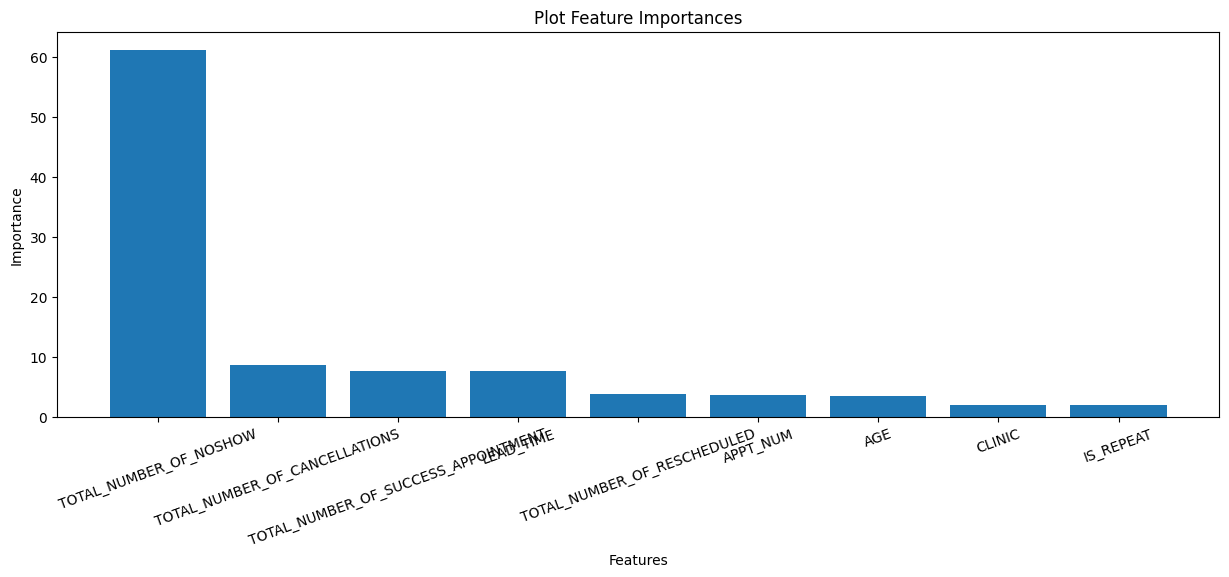

In [24]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

In [25]:
pickle_out = open("LRmodel_V1.pkl", "wb")
pickle.dump(gbc, pickle_out)
pickle_out.close()

In [26]:
pkl_file = open('encoder_V3.pkl', 'rb')
encoder_dict_V2 = pickle.load(pkl_file) 
pkl_file.close()

In [27]:
print(encoder_dict)

{'CLINIC': ['ARCADIA CARE CENTER', 'BAKERSFIELD CARE CLINIC', 'ENCINO CARE CENTER', 'SANTA MONICA CLINIC', 'SOUTH BAY CARE CENTER', 'Unknown', 'VALENCIA CARE CENTER'], 'IS_REPEAT': ['N', 'Unknown', 'Y'], 'IS_NOSHOW': ['N', 'Unknown', 'Y']}


In [ ]:
!streamlit run app_V1.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.4.23:8502

